# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


### Question(s) for Analysis
#### What features affect whether a patient does not attend an appointment (no_show = Yes = True)?
* Does Age feature affect patient to show or missed his appointment?
* Does SMS_received feature affect patient to show or missed his appointment?
* Is there a difference in no-show appointments according to male and female patients?

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


**Import packages that i will use**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***

<a id='wrangling'></a>
## Data Wrangling

**Steps:**
* Load the data
* Check the dataframe || show some lines using head () & tail()
* Size of No-show appointments dataframe (#row & # col) using .shape
* Understand information about data || Features dataType using .info()
* Describe the dataset and know a summary of each column by using .describe()
* Check unique values by using .nunique()


In [6]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.


**Load the data** 

In [7]:
df_no_show_appointments = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")

***

**Check the dataframe || show some lines using head () & tail()**

In [8]:
#head
df_no_show_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#tail
df_no_show_appointments.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


-NOTE: According to the output i import data correctly

***

**Size of No-show appointments dataframe (#row & # col) using .shape**

In [10]:
size = df_no_show_appointments.shape
print(f"Size of this dataframe = {size} in particular DF has {size[0]} rows, and {size[1]} features.")

Size of this dataframe = (110527, 14) in particular DF has 110527 rows, and 14 features.


***

**Understand information about data || Features dataType using .info()**

In [11]:
df_no_show_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


-NOTE: According to the output there is no null values ans some Dtype must convert to reduce memory


***

**Describe the dataset and know a summary of each column by using .describe()**

In [12]:
df_no_show_appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


-NOTE: According to the output there is some column that maybe have just 2 values so we check next to
    convert it and there is a negative age value

***

**Check unique values by using .nunique()**

In [13]:
df_no_show_appointments.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

-NOTE: As i say above about values from 2-5 here im sure that i should convert it in the cleaning section

***


### Data Cleaning


In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


**Check if there is missing values using .isnull()**

In [15]:
df_no_show_appointments.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

-NOTE: According to the output there is no missing values on this data

***

**Check if there is any duplicates on the data by using .duplicated()**

In [16]:
df_no_show_appointments.duplicated().sum()

0

-NOTE: So there is no duplicated on the data

***

**As we see there is no missing values, no duplicates and column names clear so don't need to change so lets continue fix negative value and fix data types**

**Fix negative value on age (-1)**

In [17]:
invalid_age = df_no_show_appointments['Age'] < 0
invalid_age_records = df_no_show_appointments[invalid_age]
total_records = invalid_age_records.shape[0]
total_records

1

-NOTE: As we see there is just one column that have negative values so we can drop it

In [18]:
df_no_show_appointments.drop(invalid_age_records.index, inplace=True)

**Check to ensure it was delete**

In [19]:
df_no_show_appointments[df_no_show_appointments['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


-NOTE: row was dropped successfully

***

In [20]:
df_no_show_appointments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


**Start fix data types so convert:**
* PatientId     (float64 -> int64)
* Gender        (object -> category)
* Age           (int64-> uint8 "u=unsigned")it's range 0-255
* Scholarship   (int64 -> boolean)
* Hipertension  (int64 -> boolean)
* Diabetes      (int64 -> boolean)
* Alcoholism    (int64 -> boolean)
* Handcap       (int64 -> int8)
* SMS_received  (int64 -> boolean)
* No-show       (object -> string -> boolean)
* Neighbourhood (object -> string)

In [37]:
# create function to convert data type
def convert_data_type(col_name, convert_type, df= df_no_show_appointments,):
    df[col_name] = df[col_name].astype(convert_type)
# call the function
convert_data_type('PatientId', 'int64')
convert_data_type('Gender', 'category')
convert_data_type('Age', 'uint8')
convert_data_type('Scholarship', 'boolean')
convert_data_type('Hipertension', 'boolean')
convert_data_type('Diabetes', 'boolean')
convert_data_type('Alcoholism', 'boolean')
convert_data_type('Handcap', 'int8')
convert_data_type('SMS_received', 'boolean')
convert_data_type('Neighbourhood', 'string')

To convert No-show from object to boolean first not work immediately so i convert it to string then map the values then convert it to boolena

In [47]:
# convert by fun to string
convert_data_type('No-show', 'string')
# map values
df_no_show_appointments['No-show'] = df_no_show_appointments['No-show'].map({'Yes': True, 'No': False})
#convert by function to boolean
convert_data_type('No-show', 'boolean')

**Check the data types**

In [46]:
df_no_show_appointments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PatientId       110526 non-null  int64   
 1   AppointmentID   110526 non-null  int64   
 2   Gender          110526 non-null  category
 3   ScheduledDay    110526 non-null  object  
 4   AppointmentDay  110526 non-null  object  
 5   Age             110526 non-null  uint8   
 6   Neighbourhood   110526 non-null  string  
 7   Scholarship     110526 non-null  boolean 
 8   Hipertension    110526 non-null  boolean 
 9   Diabetes        110526 non-null  boolean 
 10  Alcoholism      110526 non-null  boolean 
 11  Handcap         110526 non-null  int8    
 12  SMS_received    110526 non-null  boolean 
 13  No-show         110526 non-null  boolean 
dtypes: boolean(6), category(1), int64(2), int8(1), object(2), string(1), uint8(1)
memory usage: 6.6+ MB


-NOTE: As we see memory usage reduced from 12.6 to 6.6 and that is good!

***

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 ( Does Age feature affect  patient to show or missed his appointment? )

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Explore the distribution of 'No-show' variable
#

**Create two df one 'df_no_show' when No-show = True "miss the appointment" and the other 'df_show' when No-show = False "show the appointment"**

In [25]:
df_no_show = df_no_show_appointments[df_no_show_appointments['No-show'] == True]
df_show = df_no_show_appointments[df_no_show_appointments['No-show'] == False]

**Plot the distribution of ages for no-show appointments** using histogram

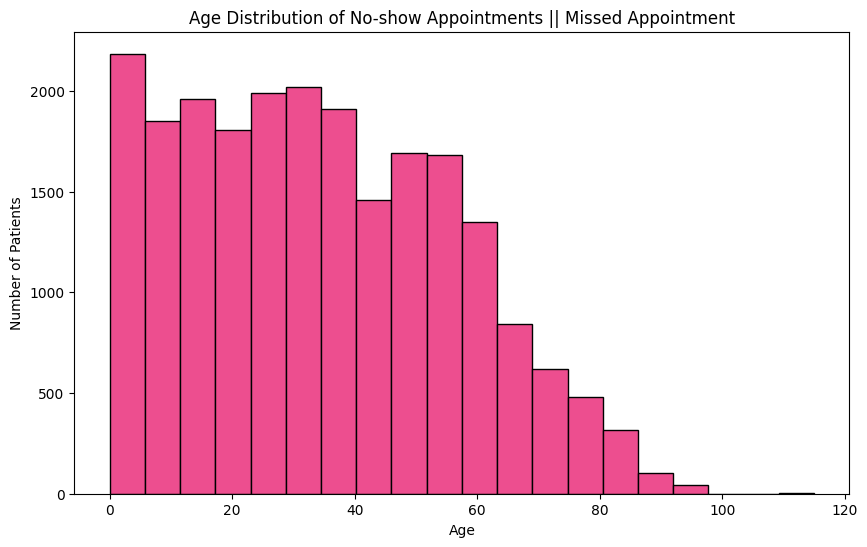

In [26]:
def plot_age_distribution(df, age_column, title, color='#ed4e8f', bins=20, edgecolor='black'):
    plt.figure(figsize=(10, 6))
    plt.hist(df[age_column], bins=bins, color=color, edgecolor=edgecolor)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Number of Patients')
    plt.show()
# call the plot function to plot
plot_age_distribution(df_no_show, 'Age', 'Age Distribution of No-show Appointments || Missed Appointment')

**Notes:**
A histogram was used to show the age distribution for no-show appointments. It highlighted the age groups that are more likely to miss appointments.

PLUS: **Plot the distribution of ages for both no-show and show appointments** using histogram

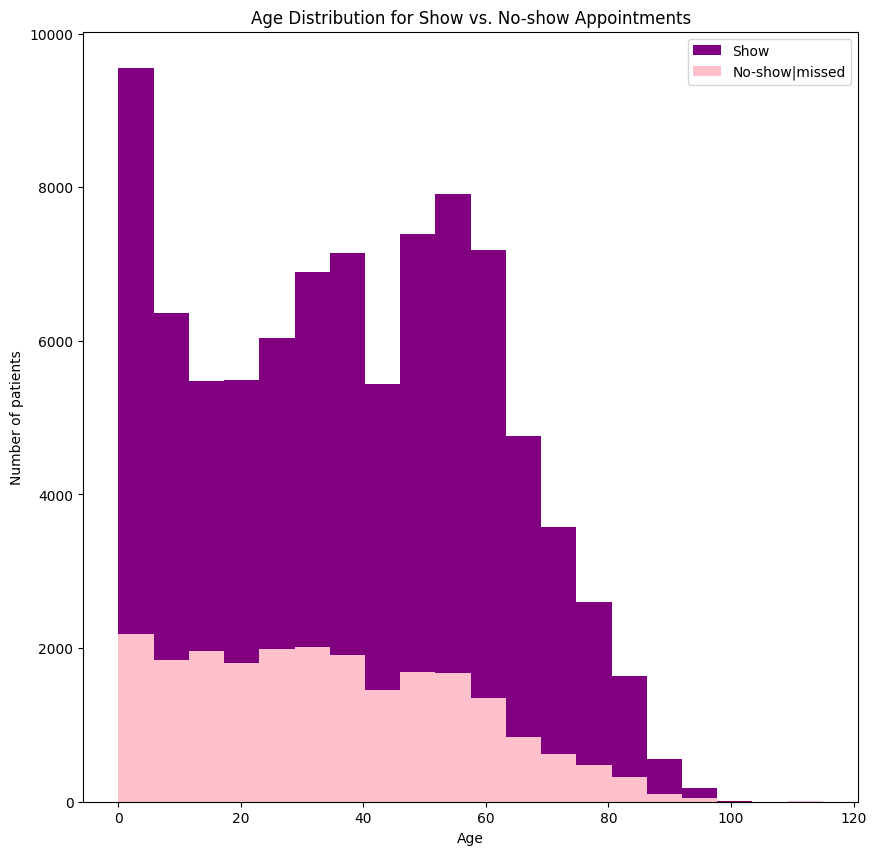

In [27]:
plt.figure(figsize=(10, 10))
plt.hist(df_show['Age'], color='purple',bins=20, label='Show')
plt.hist(df_no_show['Age'], color='pink',bins=20, label='No-show|missed')
plt.title('Age Distribution for Show vs. No-show Appointments')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.legend()
plt.show()

***

### Research Question 2  (Does SMS_received feature affect patient to show or missed his appointment?)

In [28]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

**Create the data that i need for my question**

In [29]:
sms_received_counts = df_no_show['SMS_received'].value_counts()

****Plot the distribution of SMS_received for no-show appointments** using Bar plot

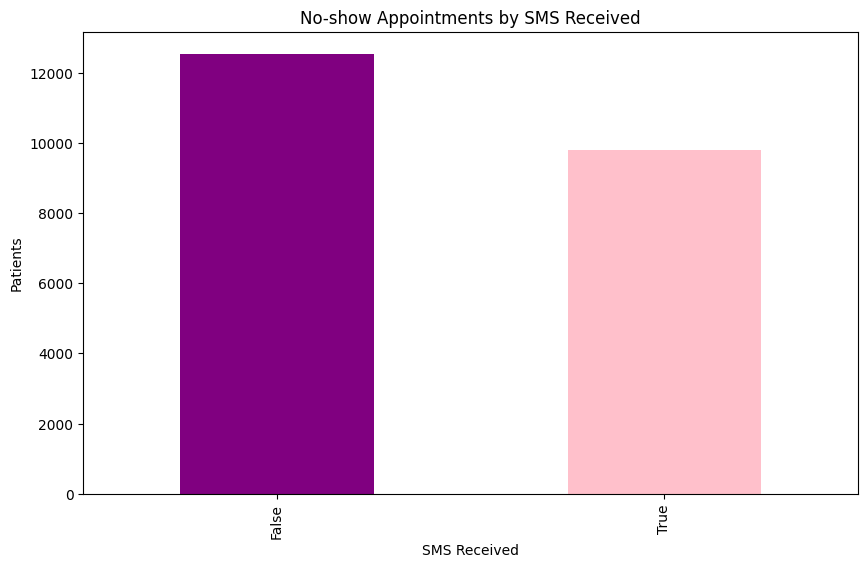

In [30]:
sms_received_counts.plot(kind='bar', figsize=(10, 6), color=['purple', 'pink'])
plt.title('No-show Appointments by SMS Received')
plt.xlabel('SMS Received')
plt.ylabel('Patients')
plt.show()

**Notes:**
A bar chart was used to compare the number of patients who received an SMS reminder and their attendance status. This visualization effectively showed the impact of SMS reminders on appointment attendance.

***

### Research Question 3  (Is there a difference in no-show appointments according to male and female patients?)

**Create the data that i need for my question**

In [31]:
gender_counts_no_show = df_no_show['Gender'].value_counts()

**Plot the distribution of Gender for no-show appointments** using pie plot

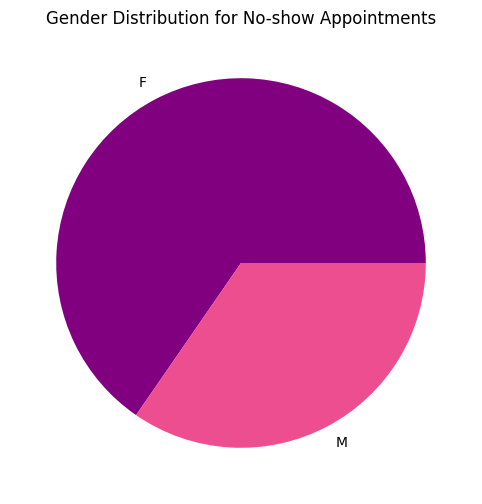

In [32]:
plt.figure(figsize=(12, 6))
plt.pie(gender_counts_no_show, labels=gender_counts_no_show.index, colors=['purple', '#ed4e8f'])
plt.title('Gender Distribution for No-show Appointments')
plt.show()

**Notes:**
A pie chart was created to visualize the gender distribution of patients who did not show up for their appointments. This chart provided a clear comparison of no-show rates between male and female patients.

***

<a id='conclusions'></a>
## Conclusions
***
### Summary of Findings
**Research Question:
What features affect whether a patient does not attend an appointment (no_show = Yes = True)?**

Key Findings:

**Age Distribution:** 
* Does Age feature affect patient to show or missed his appointment?
* Observation: Younger patients (ages 0-5) and elderly patients (ages 100 and above) tend to have higher no-show rates.
* Implication: This could suggest that dependencies on others for transportation or maybe death for patients over 100 might influence no-show rates in these age groups.

**Gender Distribution:** 
* Is there a difference in no-show appointments according to male and female patients?
* Observation: There is a slightly higher no-show rate among female patients compared to male patients.
* Implication: While the difference is not stark, it may be worth investigating if there are specific barriers that female patients face in attending appointments, but i think due to responsibility and challenges that faces.

**SMS Received:** 
* Does SMS_received feature affect patient to show or missed his appointment?
*Observation: Patients who received an SMS reminder showed up for their appointments at a higher rate compared to those who did not.
* Implication: This suggests that SMS reminders could be an effective tool in reducing no-show rates.
*** 
### Limitations
**Data Completeness:**
The dataset may not capture all relevant factors influencing no-show rates, such as socioeconomic status, transportation availability, or specific health conditions.
***
### Future Research:
**Investigating Socioeconomic Factors:**

Including data on socioeconomic status, insurance coverage, and transportation options could provide a more comprehensive understanding of the barriers to appointment attendance.
***
### Conclusion
This analysis has provided insights into the factors associated with no-show appointments, i'm highlighting the importance of age, gender, and SMS reminders. While useful correlations were identified, further research is needed to explore causative factors and develop effective strategies to reduce no-show rates. Ensuring data completeness and considering additional factors in future study will help create a more comprehensive understanding of this issue.
***

## Submitting your Project 


In [33]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 479610 bytes to Investigate_a_Dataset.html
